# IEEE-CIS Fraud Detection - Classifications

## Imports

In [17]:
# Dataset
import pandas as pd
import numpy as np

# Graph
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# Math
from PIL import Image

# Imbalanced dataset
from imblearn.over_sampling import RandomOverSampler 

from functions.balance_dataset import balance_dataset 
from functions.test_hyperparameters import test_hyperparameters 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from functions.create_classifier import create_classifier, plot_confusion_matrix 
from sklearn.model_selection import train_test_split

## Read files

In [ ]:
# !unzip '../data/train_transaction.zip' -d '../data'
!unzip '../data/test_transaction.zip' -d '../data'

Archive:  ../data/test_transaction.zip
  inflating: ../data/test_transaction.csv  


In [2]:
train_transaction_df = pd.read_csv("../data/train_transaction.csv")

In [4]:
print(train_transaction_df.shape)

(590540, 394)
(506691, 393)


In [5]:
train_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preprocessing

All columns

In [6]:
print(train_transaction_df.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

Remove NaN values

In [6]:
train_transaction_df = train_transaction_df.replace(np.nan, 0)

Limit to 5000 samples

In [7]:
X_df = train_transaction_df[:5000]
y_df = train_transaction_df['isFraud'][:5000]

Transform categorical attributes on dummy variables

Categorical features:
- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9

In [8]:
ProductCD_data = pd.get_dummies(X_df['ProductCD']).add_prefix('ProductCD_')
P_emaildomain_data = pd.get_dummies(X_df['P_emaildomain']).add_prefix('P_emaildomain_')
R_emaildomain_data = pd.get_dummies(X_df['R_emaildomain']).add_prefix('R_emaildomain_')

card1_data = pd.get_dummies(X_df['card1']).add_prefix('card1_')
card2_data = pd.get_dummies(X_df['card2']).add_prefix('card2_')
card3_data = pd.get_dummies(X_df['card3']).add_prefix('card3_')
card4_data = pd.get_dummies(X_df['card4']).add_prefix('card4_')
card5_data = pd.get_dummies(X_df['card5']).add_prefix('card5_')
card6_data = pd.get_dummies(X_df['card6']).add_prefix('card6_')

addr1_data = pd.get_dummies(X_df['addr1']).add_prefix('addr1_')
addr2_data = pd.get_dummies(X_df['addr2']).add_prefix('addr2_')

M1_data = pd.get_dummies(X_df['M1']).add_prefix('M1_')
M2_data = pd.get_dummies(X_df['M2']).add_prefix('M2_')
M3_data = pd.get_dummies(X_df['M3']).add_prefix('M3_')
M4_data = pd.get_dummies(X_df['M4']).add_prefix('M4_')
M5_data = pd.get_dummies(X_df['M5']).add_prefix('M5_')
M6_data = pd.get_dummies(X_df['M6']).add_prefix('M6_')
M7_data = pd.get_dummies(X_df['M7']).add_prefix('M7_')
M8_data = pd.get_dummies(X_df['M8']).add_prefix('M8_')
M9_data = pd.get_dummies(X_df['M9']).add_prefix('M9_')

y = X_df['isFraud']
X_df = X_df[X_df.columns.drop(['isFraud', 'TransactionID','ProductCD', 'P_emaildomain', 'R_emaildomain', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'])]

df = pd.concat([X_df, ProductCD_data, P_emaildomain_data, R_emaildomain_data, 
                    card1_data, card2_data, card3_data, card4_data, card5_data, card6_data,
                    addr1_data, addr2_data,
                    M1_data, M2_data, M3_data, M4_data, M5_data, M6_data, M7_data, M8_data, M9_data], join = 'outer', axis=1)


In [19]:
df.head()

,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,...,M6_T,M7_0,M7_F,M7_T,M8_0,M8_F,M8_T,M9_0,M9_F,M9_T
0,86400,68.5,19.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1,1,0,0,1,0,0,1,0,0
1,86401,29.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1,1,0,0,1,0,0,1,0,0
2,86469,59.0,287.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,1,0,0,1,0
3,86499,50.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,4.0,...,0,1,0,0,1,0,0,1,0,0
4,86506,50.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,1,0,0,1,0,0,1,0,0


In [20]:
df.shape

(5000, 2263)

## Balance dataset

Analyzing the proportion of fraudulent samples:

In [9]:
y.value_counts(normalize=True)

0    0.9782
1    0.0218
Name: isFraud, dtype: float64

The fraudulent samples are approximately 2% of the dataset, so we are dealing with an unbalanced dataset.

We'll apply an oversampling technique.

In [10]:
def balance_dataset(X, y, proportion):
    oversample = RandomOverSampler(sampling_strategy=proportion)    
    X, y = oversample.fit_resample(X, y)

    return X, y

Define not balanced dataset

In [11]:
X_not_balanced_02 = df
y_not_balanced_02 = y

Define balanced dataset

In [12]:
X_balanced_10, y_balanced_10 = balance_dataset(df, y, 0.112) # 10% fraud
X_balanced_20, y_balanced_20 = balance_dataset(df, y, 0.251) # 20% fraud
X_balanced_30, y_balanced_30 = balance_dataset(df, y, 0.43)  # 30% fraud
X_balanced_40, y_balanced_40 = balance_dataset(df, y, 0.667) # 40% fraud
X_balanced_50, y_balanced_50 = balance_dataset(df, y, 1)     # 50% fraud

In [13]:
y_balanced_50.value_counts(normalize=True)

0    0.5
1    0.5
Name: isFraud, dtype: float64

## Split dataset

In [14]:
X_not_balanced_02_train, X_not_balanced_02_test, y_not_balanced_02_train, y_not_balanced_02_test = train_test_split(X_not_balanced_02, y_not_balanced_02, test_size=0.25, random_state=0)

X_balanced_10_train, X_balanced_10_test, y_balanced_10_train, y_balanced_10_test = train_test_split(X_balanced_10, y_balanced_10, test_size=0.25, random_state=0)
X_balanced_20_train, X_balanced_20_test, y_balanced_20_train, y_balanced_20_test = train_test_split(X_balanced_20, y_balanced_20, test_size=0.25, random_state=0)
X_balanced_30_train, X_balanced_30_test, y_balanced_30_train, y_balanced_30_test = train_test_split(X_balanced_30, y_balanced_30, test_size=0.25, random_state=0)
X_balanced_40_train, X_balanced_40_test, y_balanced_40_train, y_balanced_40_test = train_test_split(X_balanced_40, y_balanced_40, test_size=0.25, random_state=0)
X_balanced_50_train, X_balanced_50_test, y_balanced_50_train, y_balanced_50_test = train_test_split(X_balanced_50, y_balanced_50, test_size=0.25, random_state=0)

print('X_train.shape', X_balanced_50_train.shape)
print('X_test.shape', X_balanced_50_test.shape)

X_train.shape (7336, 2263)
X_test.shape (2446, 2263)


## Classification

### Normalize data for Naive Bayes

In [15]:
scaler = MinMaxScaler()

X_not_balanced_02_train_normalized = scaler.fit(X_not_balanced_02_train).transform(X_not_balanced_02_train)
X_balanced_10_train_normalized = scaler.fit(X_balanced_10_train).transform(X_balanced_10_train)
X_balanced_20_train_normalized = scaler.fit(X_balanced_20_train).transform(X_balanced_20_train)
X_balanced_30_train_normalized = scaler.fit(X_balanced_30_train).transform(X_balanced_30_train)
X_balanced_40_train_normalized = scaler.fit(X_balanced_40_train).transform(X_balanced_40_train)
X_balanced_50_train_normalized = scaler.fit(X_balanced_50_train).transform(X_balanced_50_train)

X_not_balanced_02_test_normalized = scaler.fit(X_not_balanced_02_test).transform(X_not_balanced_02_test)
X_balanced_10_test_normalized = scaler.fit(X_balanced_10_test).transform(X_balanced_10_test)
X_balanced_20_test_normalized = scaler.fit(X_balanced_20_test).transform(X_balanced_20_test)
X_balanced_30_test_normalized = scaler.fit(X_balanced_30_test).transform(X_balanced_30_test)
X_balanced_40_test_normalized = scaler.fit(X_balanced_40_test).transform(X_balanced_40_test)
X_balanced_50_test_normalized = scaler.fit(X_balanced_50_test).transform(X_balanced_50_test)

### Test Hyperparameters

In [16]:
def test_hyperparameters(classifier, X_train, y_train):
    parameters = {}
    classification = None

    if classifier == 'Random Forest':
        parameters = {'n_estimators': [100, 300, 500], "max_depth": [
            3, 5, 7, None], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']}
        classification = RandomForestClassifier(random_state=0)
    elif classifier == 'Naive Bayes':
        parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}
        classification = MultinomialNB()
    elif classifier == 'Support Vector Machine':
        parameters = {'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'C': [1, 10, 100, 1000]}
        classification = SVC(random_state=0)
    elif classifier == 'Multilayer Perceptron':
        parameters = {'hidden_layer_sizes': [(100,), (300,), (500,)], 'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}
        classification = MLPClassifier(random_state=0)

    score = 'f1'

    clf = GridSearchCV(classification, parameters, scoring="%s_macro" % score, cv=5)
    clf.fit(X_train, y_train)
    
    output = f"Best hyperparameters for {classifier}: {clf.best_params_}\n"
    print(output)
    

#### PCA unbalanced (2% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_not_balanced_02_train_normalized, y_not_balanced_02_train)
test_hyperparameters('Support Vector Machine', X_not_balanced_02_train, y_not_balanced_02_train)
test_hyperparameters('Random Forest', X_not_balanced_02_train, y_not_balanced_02_train)
test_hyperparameters('Multilayer Perceptron', X_not_balanced_02_train, y_not_balanced_02_train)

## Result
# Best hyperparameters for Naive Bayes: {'alpha': 1}
# Best hyperparameters for Support Vector Machine: {'C': 10, 'kernel': 'linear'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}
# Best hyperparameters for Multilayer Perceptron: Best hyperparameters for Multilayer Perceptron: {'alpha': 0.001, 'hidden_layer_sizes': (500,), 'learning_rate': 'constant', 'solver': 'adam'}

#### PCA unbalanced (10% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_balanced_10_train_normalized, y_balanced_10_train)
test_hyperparameters('Support Vector Machine', X_balanced_10_train, y_balanced_10_train)
test_hyperparameters('Random Forest', X_balanced_10_train, y_balanced_10_train)
test_hyperparameters('Multilayer Perceptron', X_balanced_20_train, y_balanced_20_train)

## Results
# Best hyperparameters for Naive Bayes: {'alpha': 0.0001}
# Best hyperparameters for Support Vector Machine: {'C': 1, 'kernel': 'linear'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
# Best hyperparameters for Multilayer Perceptron: Best hyperparameters for Multilayer Perceptron: {'alpha': 0.01, 'hidden_layer_sizes': (500,), 'learning_rate': 'constant', 'solver': 'adam'}

#### PCA unbalanced (20% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_balanced_20_train_normalized, y_balanced_20_train)
test_hyperparameters('Support Vector Machine', X_balanced_20_train, y_balanced_20_train)
test_hyperparameters('Random Forest', X_balanced_20_train, y_balanced_20_train)
test_hyperparameters('Multilayer Perceptron', X_balanced_20_train, y_balanced_20_train)

## Results
# Best hyperparameters for Naive Bayes: {'alpha': 0.0001}
# Best hyperparameters for Support Vector Machine: {'C': 100, 'kernel': 'linear'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
# Best hyperparameters for Multilayer Perceptron: {'alpha': 0.0001, 'hidden_layer_sizes': (300,), 'learning_rate': 'constant', 'solver': 'adam'}

#### PCA unbalanced (30% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_balanced_30_train_normalized, y_balanced_30_train)
test_hyperparameters('Support Vector Machine', X_balanced_30_train, y_balanced_30_train)
test_hyperparameters('Random Forest', X_balanced_30_train, y_balanced_30_train)
test_hyperparameters('Multilayer Perceptron', X_balanced_30_train, y_balanced_30_train)

## Results
# Best hyperparameters for Naive Bayes: {'alpha': 0.0001}
# Best hyperparameters for Support Vector Machine: {'C': 100, 'kernel': 'linear'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
# Best hyperparameters for Multilayer Perceptron: {'alpha': 0.1, 'hidden_layer_sizes': (300,), 'learning_rate': 'constant', 'solver': 'adam'}

#### PCA unbalanced (40% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_balanced_40_train_normalized, y_balanced_40_train)
test_hyperparameters('Support Vector Machine', X_balanced_40_train, y_balanced_40_train)
test_hyperparameters('Random Forest', X_balanced_40_train, y_balanced_40_train)
test_hyperparameters('Multilayer Perceptron', X_balanced_40_train, y_balanced_40_train)

## Results
# Best hyperparameters for Naive Bayes: {'alpha': 0.0001}
# Best hyperparameters for Support Vector Machine: {'C': 100, 'kernel': 'linear'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
# Best hyperparameters for Multilayer Perceptron: {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}

#### PCA unbalanced (50% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_balanced_50_train_normalized, y_balanced_50_train)
test_hyperparameters('Support Vector Machine', X_balanced_50_train, y_balanced_50_train)
test_hyperparameters('Random Forest', X_balanced_50_train, y_balanced_50_train)
test_hyperparameters('Multilayer Perceptron', X_balanced_50_train, y_balanced_50_train)

## Results
# Best hyperparameters for Naive Bayes: {'alpha': 0.0001}
# Best hyperparameters for Support Vector Machine: 
# Best hyperparameters for Random Forest: 
# Best hyperparameters for Multilayer Perceptron:

### Classification

- Support Vector Machine
- Random Forest
- Naive Bayes
- Multilayer Perceptron

#### PCA unbalanced (0.2% fraud)


Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1220
           1       0.15      0.43      0.23        30

    accuracy                           0.93      1250
   macro avg       0.57      0.69      0.60      1250
weighted avg       0.97      0.93      0.95      1250

Confusion Matrix: 


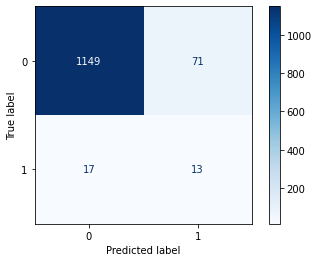

In [18]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_not_balanced_02_train_normalized, y_not_balanced_02_train, 
                          X_not_balanced_02_test_normalized, y_not_balanced_02_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_not_balanced_02_test_normalized, y_not_balanced_02_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1220
           1       1.00      0.23      0.38        30

    accuracy                           0.98      1250
   macro avg       0.99      0.62      0.68      1250
weighted avg       0.98      0.98      0.98      1250

Confusion Matrix: 


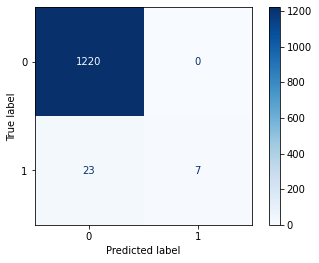

In [23]:
svm_clf = SVC(kernel='poly', C=1)

y_pred = create_classifier(svm_clf, X_not_balanced_02_train_normalized, y_not_balanced_02_train, 
                          X_not_balanced_02_test_normalized, y_not_balanced_02_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_not_balanced_02_test_normalized, y_not_balanced_02_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1220
           1       1.00      0.10      0.18        30

    accuracy                           0.98      1250
   macro avg       0.99      0.55      0.59      1250
weighted avg       0.98      0.98      0.97      1250

Confusion Matrix: 


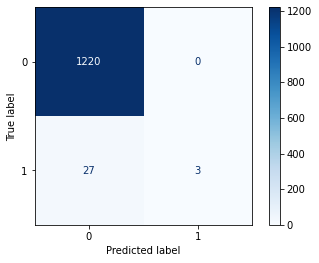

In [24]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=3, criterion='gini')

y_pred = create_classifier(rf_clf, X_not_balanced_02_train_normalized, y_not_balanced_02_train, 
                          X_not_balanced_02_test_normalized, y_not_balanced_02_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_not_balanced_02_test_normalized, y_not_balanced_02_test)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1220
           1       0.44      0.53      0.48        30

    accuracy                           0.97      1250
   macro avg       0.72      0.76      0.74      1250
weighted avg       0.98      0.97      0.97      1250

Confusion Matrix: 


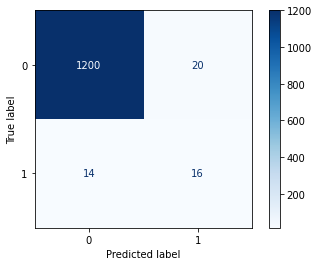

In [40]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.001, random_state=0)

y_pred = create_classifier(mlp_clf, X_not_balanced_02_train_normalized, y_not_balanced_02_train, 
                          X_not_balanced_02_test_normalized, y_not_balanced_02_test)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_not_balanced_02_test_normalized, y_not_balanced_02_test)

#### PCA balanced (10% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1221
           1       0.55      0.67      0.60       139

    accuracy                           0.91      1360
   macro avg       0.75      0.80      0.78      1360
weighted avg       0.92      0.91      0.91      1360

Confusion Matrix: 


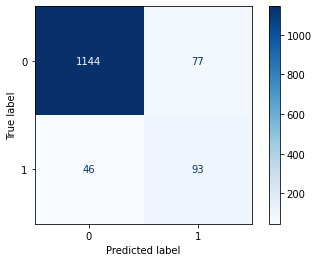

In [19]:
nb_clf = MultinomialNB(alpha=0.0001)

y_pred = create_classifier(nb_clf, X_balanced_10_train_normalized, y_balanced_10_train, 
                          X_balanced_10_test_normalized, y_balanced_10_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_balanced_10_test_normalized, y_balanced_10_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1221
           1       0.99      0.64      0.78       139

    accuracy                           0.96      1360
   macro avg       0.97      0.82      0.88      1360
weighted avg       0.96      0.96      0.96      1360

Confusion Matrix: 


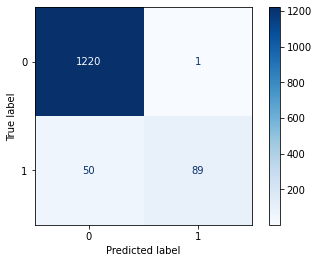

In [25]:
svm_clf = SVC(kernel='rbf', C=1)

y_pred = create_classifier(svm_clf, X_balanced_10_train_normalized, y_balanced_10_train, 
                          X_balanced_10_test_normalized, y_balanced_10_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_balanced_10_test_normalized, y_balanced_10_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1221
           1       1.00      0.20      0.34       139

    accuracy                           0.92      1360
   macro avg       0.96      0.60      0.65      1360
weighted avg       0.93      0.92      0.89      1360

Confusion Matrix: 


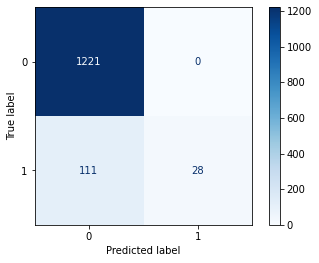

In [26]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=5, criterion='gini')

y_pred = create_classifier(rf_clf, X_balanced_10_train_normalized, y_balanced_10_train, 
                          X_balanced_10_test_normalized, y_balanced_10_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_balanced_10_test_normalized, y_balanced_10_test)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1221
           1       0.89      0.96      0.93       139

    accuracy                           0.98      1360
   macro avg       0.94      0.98      0.96      1360
weighted avg       0.99      0.98      0.98      1360

Confusion Matrix: 


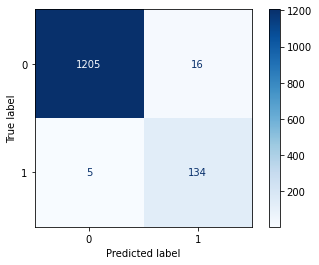

In [39]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.001, random_state=0)

y_pred = create_classifier(mlp_clf, X_balanced_10_train_normalized, y_balanced_10_train, 
                          X_balanced_10_test_normalized, y_balanced_10_test)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_balanced_10_test_normalized, y_balanced_10_test)

#### PCA balanced (20% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1255
           1       0.67      0.67      0.67       275

    accuracy                           0.88      1530
   macro avg       0.80      0.80      0.80      1530
weighted avg       0.88      0.88      0.88      1530

Confusion Matrix: 


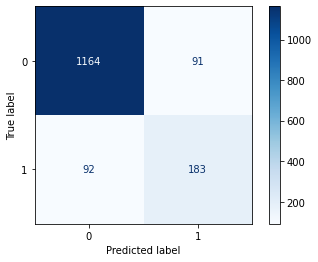

In [27]:
nb_clf = MultinomialNB(alpha=0.0001)

y_pred = create_classifier(nb_clf, X_balanced_20_train_normalized, y_balanced_20_train, 
                          X_balanced_20_test_normalized, y_balanced_20_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_balanced_20_test_normalized, y_balanced_20_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1255
           1       0.97      0.92      0.94       275

    accuracy                           0.98      1530
   macro avg       0.98      0.96      0.97      1530
weighted avg       0.98      0.98      0.98      1530

Confusion Matrix: 


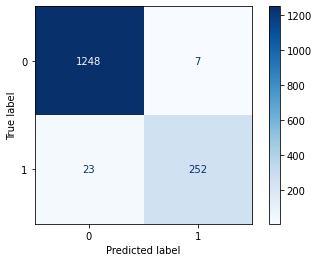

In [28]:
svm_clf = SVC(kernel='rbf', C=1)

y_pred = create_classifier(svm_clf, X_balanced_20_train_normalized, y_balanced_20_train, 
                          X_balanced_20_test_normalized, y_balanced_20_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_balanced_20_test_normalized, y_balanced_20_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1255
           1       0.98      0.21      0.35       275

    accuracy                           0.86      1530
   macro avg       0.92      0.61      0.64      1530
weighted avg       0.88      0.86      0.82      1530

Confusion Matrix: 


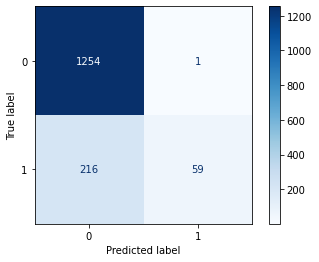

In [29]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=3, criterion='gini')

y_pred = create_classifier(rf_clf, X_balanced_20_train_normalized, y_balanced_20_train, 
                          X_balanced_20_test_normalized, y_balanced_20_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_balanced_20_test_normalized, y_balanced_20_test)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1255
           1       0.93      1.00      0.96       275

    accuracy                           0.99      1530
   macro avg       0.97      0.99      0.98      1530
weighted avg       0.99      0.99      0.99      1530

Confusion Matrix: 


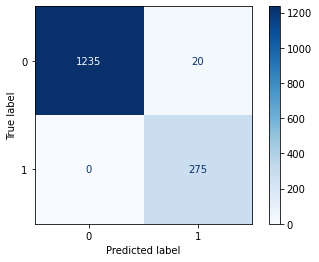

In [38]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.001, random_state=0)

y_pred = create_classifier(mlp_clf, X_balanced_20_train_normalized, y_balanced_20_train, 
                          X_balanced_20_test_normalized, y_balanced_20_test)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_balanced_20_test_normalized, y_balanced_20_test)

#### PCA balanced (30% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1227
           1       0.80      0.64      0.71       522

    accuracy                           0.84      1749
   macro avg       0.83      0.78      0.80      1749
weighted avg       0.84      0.84      0.84      1749

Confusion Matrix: 


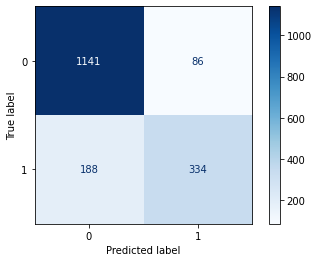

In [20]:
nb_clf = MultinomialNB(alpha=0.0001)

y_pred = create_classifier(nb_clf, X_balanced_30_train_normalized, y_balanced_30_train, 
                          X_balanced_30_test_normalized, y_balanced_30_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_balanced_30_test_normalized, y_balanced_30_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1227
           1       0.97      1.00      0.98       522

    accuracy                           0.99      1749
   macro avg       0.99      0.99      0.99      1749
weighted avg       0.99      0.99      0.99      1749

Confusion Matrix: 


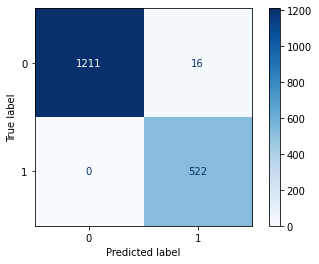

In [30]:
svm_clf = SVC(kernel='rbf', C=1)

y_pred = create_classifier(svm_clf, X_balanced_30_train_normalized, y_balanced_30_train, 
                          X_balanced_30_test_normalized, y_balanced_30_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_balanced_30_test_normalized, y_balanced_30_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1227
           1       0.96      0.25      0.39       522

    accuracy                           0.77      1749
   macro avg       0.86      0.62      0.63      1749
weighted avg       0.82      0.77      0.72      1749

Confusion Matrix: 


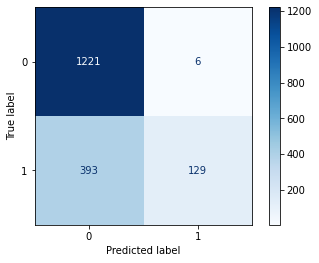

In [31]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=3, criterion='gini')

y_pred = create_classifier(rf_clf, X_balanced_30_train_normalized, y_balanced_30_train, 
                          X_balanced_30_test_normalized, y_balanced_30_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_balanced_30_test_normalized, y_balanced_30_test)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1227
           1       0.92      1.00      0.96       522

    accuracy                           0.97      1749
   macro avg       0.96      0.98      0.97      1749
weighted avg       0.98      0.97      0.97      1749

Confusion Matrix: 


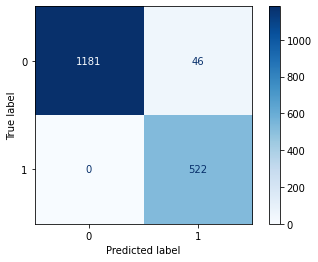

In [35]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.001, random_state=0)

y_pred = create_classifier(mlp_clf, X_balanced_30_train_normalized, y_balanced_30_train, 
                          X_balanced_30_test_normalized, y_balanced_30_test)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_balanced_30_test_normalized, y_balanced_30_test)

#### PCA balanced (40% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1222
           1       0.87      0.63      0.73       817

    accuracy                           0.81      2039
   macro avg       0.83      0.78      0.79      2039
weighted avg       0.82      0.81      0.81      2039

Confusion Matrix: 


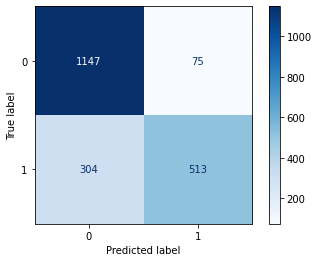

In [21]:
nb_clf = MultinomialNB(alpha=0.0001)

y_pred = create_classifier(nb_clf, X_balanced_40_train_normalized, y_balanced_40_train, 
                          X_balanced_40_test_normalized, y_balanced_40_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_balanced_40_test_normalized, y_balanced_40_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1955
           1       1.00      1.00      1.00      1369

    accuracy                           1.00      3324
   macro avg       1.00      1.00      1.00      3324
weighted avg       1.00      1.00      1.00      3324

Confusion Matrix: 


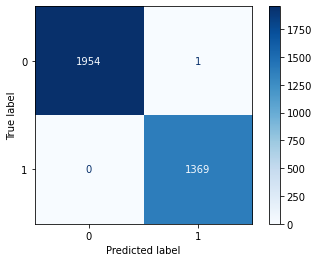

In [ ]:
svm_clf = SVC(kernel='poly', C=100)

y_pred = create_classifier(svm_clf, X_balanced_40_train_normalized, y_balanced_40_train, 
                          X_balanced_40_test_normalized, y_balanced_40_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_balanced_40_test_normalized, y_balanced_40_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       0.71      0.97      0.82      1222
           1       0.91      0.41      0.56       817

    accuracy                           0.75      2039
   macro avg       0.81      0.69      0.69      2039
weighted avg       0.79      0.75      0.72      2039

Confusion Matrix: 


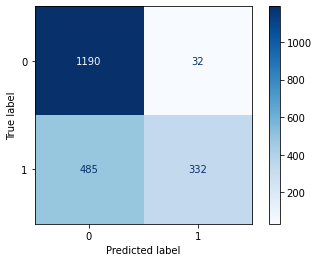

In [32]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=3, criterion='gini')

y_pred = create_classifier(rf_clf, X_balanced_40_train_normalized, y_balanced_40_train, 
                          X_balanced_40_test_normalized, y_balanced_40_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_balanced_40_test_normalized, y_balanced_40_test)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1222
           1       0.97      1.00      0.99       817

    accuracy                           0.99      2039
   macro avg       0.99      0.99      0.99      2039
weighted avg       0.99      0.99      0.99      2039

Confusion Matrix: 


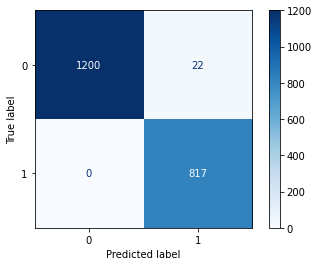

In [36]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.001, random_state=0)

y_pred = create_classifier(mlp_clf, X_balanced_40_train_normalized, y_balanced_40_train, 
                          X_balanced_40_test_normalized, y_balanced_40_test)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_balanced_40_test_normalized, y_balanced_40_test)

#### PCA balanced (50% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1209
           1       0.92      0.68      0.78      1237

    accuracy                           0.81      2446
   macro avg       0.83      0.81      0.81      2446
weighted avg       0.83      0.81      0.81      2446

Confusion Matrix: 


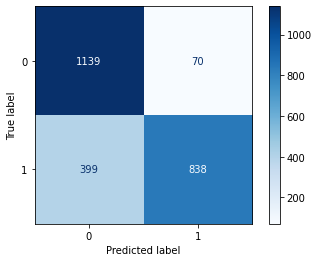

In [22]:
nb_clf = MultinomialNB(alpha=0.0001)

y_pred = create_classifier(nb_clf, X_balanced_50_train_normalized, y_balanced_50_train, 
                          X_balanced_50_test_normalized, y_balanced_50_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_balanced_50_test_normalized, y_balanced_50_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1209
           1       1.00      1.00      1.00      1237

    accuracy                           1.00      2446
   macro avg       1.00      1.00      1.00      2446
weighted avg       1.00      1.00      1.00      2446

Confusion Matrix: 


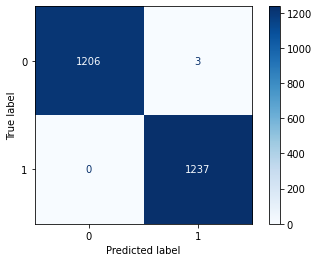

In [33]:
svm_clf = SVC(kernel='rbf', C=10)

y_pred = create_classifier(svm_clf, X_balanced_50_train_normalized, y_balanced_50_train, 
                          X_balanced_50_test_normalized, y_balanced_50_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_balanced_50_test_normalized, y_balanced_50_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      1209
           1       0.82      0.69      0.75      1237

    accuracy                           0.76      2446
   macro avg       0.77      0.76      0.76      2446
weighted avg       0.77      0.76      0.76      2446

Confusion Matrix: 


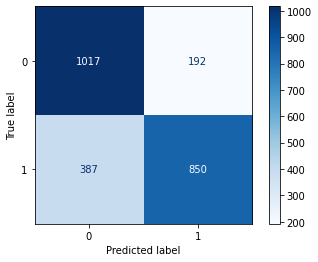

In [34]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=3, criterion='gini')

y_pred = create_classifier(rf_clf, X_balanced_50_train_normalized, y_balanced_50_train, 
                          X_balanced_50_test_normalized, y_balanced_50_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_balanced_50_test_normalized, y_balanced_50_test)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1209
           1       0.98      0.97      0.98      1237

    accuracy                           0.98      2446
   macro avg       0.98      0.98      0.98      2446
weighted avg       0.98      0.98      0.98      2446

Confusion Matrix: 


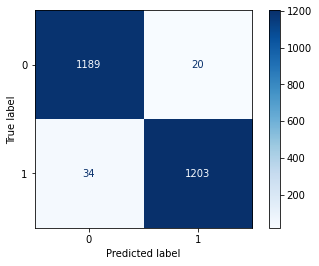

In [37]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.001, random_state=0)

y_pred = create_classifier(mlp_clf, X_balanced_50_train_normalized, y_balanced_50_train, 
                          X_balanced_50_test_normalized, y_balanced_50_test)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_balanced_50_test_normalized, y_balanced_50_test)

#### Results

In [ ]:
x_axis = ['0.3%', '1%', '10%', '20%', '30%', '40%', '50%']

fig = make_subplots(rows=1, cols=3, shared_xaxes=True, subplot_titles=['Fraud', 'Not fraud', 'Accuracy'], x_title='Balanced (%)', y_title='F1-score')

fig.add_traces([go.Scatter(x=x_axis, y=[0, 0, 0.07, 0.57, 0.81, 0.89, 0.92], name='Naive Bayes', line=dict(color="#46C756")),
                go.Scatter(x=x_axis, y=[0.82, 0.89, 1, 1, 1, 1, 1], name='Support Vector Machine', line=dict(color="#FF69B4")),
                go.Scatter(x=x_axis, y=[0.8, 1, 1, 0.98, 1, 1, 1], name='Random Forest', line=dict(color="#2E7890"))], rows=[1,1,1], cols=[1,1,1])

fig.add_traces([go.Scatter(x=x_axis, y=[1, 0.99, 0.95, 0.93, 0.94, 0.94, 0.93], line=dict(color="#46C756"), showlegend=False),
                go.Scatter(x=x_axis, y=[1, 1, 1, 1, 1, 1, 1], line=dict(color="#FF69B4"), showlegend=False),
                go.Scatter(x=x_axis, y=[1, 1, 1, 1, 1, 1, 1], line=dict(color="#2E7890"), showlegend=False)], rows=[1,1,1], cols=[2,2,2])

fig.add_traces([go.Scatter(x=x_axis, y=[0.99, 0.99, 0.91, 0.87, 0.90, 0.92, 0.92], line=dict(color="#46C756"), showlegend=False),
                go.Scatter(x=x_axis, y=[1, 1, 1, 1, 1, 1, 1], line=dict(color="#FF69B4"), showlegend=False),
                go.Scatter(x=x_axis, y=[1, 1, 1, 0.99, 1, 1, 1], line=dict(color="#2E7890"), showlegend=False)], rows=[1,1,1], cols=[3,3,3])

fig.update_layout(
plot_bgcolor = 'white',
font = {'family': 'Arial','size': 14,'color': '#37363d'})

fig.update_xaxes( showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.show()

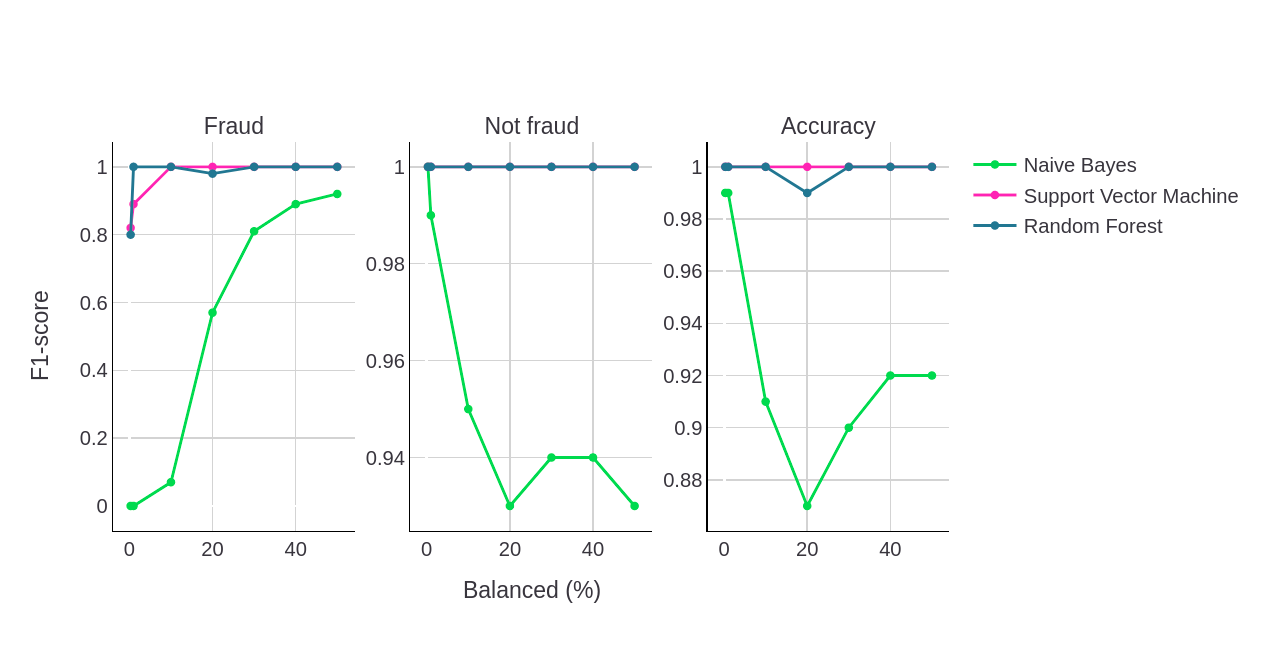

In [ ]:
classification_results = Image.open('results/classification_results.png')
classification_results